In [34]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [35]:
#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [36]:
import pandas as pd



selected_columns = [ "Rooms","Price","Distance","Bathroom","Car","Landsize","BuildingArea","YearBuilt","Propertycount"]
new_data = df[selected_columns]


data = new_data



In [37]:
data.dtypes

Rooms              int64
Price            float64
Distance         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Propertycount    float64
dtype: object

In [38]:
#Buscar nulos
data.isnull().sum()

Rooms               0
Price               0
Distance            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Propertycount       0
dtype: int64

In [39]:
#Borrado de datos nulos
data = data.dropna()
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [40]:
#Datos con área menor o igual a 800
data = data[data["BuildingArea"]<=800]
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [41]:
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [42]:
#Se eliminan los registros de menos de 15 mts cuadrados de area
data = data[data["BuildingArea"]>=5]
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [43]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
data = data[(np.abs(zscore(data['BuildingArea']))<=3)]
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [44]:
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [45]:
#Regresión lineal (Area construida vs. Precio)
x = data["BuildingArea"]
y = data["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     4315.
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:55:50   Log-Likelihood:                -97109.
No. Observations:                6678   AIC:                         1.942e+05
Df Residuals:                    6676   BIC:                         1.942e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.987e+05   1.45e+04     13.732   

In [46]:
data.dtypes

Rooms              int64
Price            float64
Distance         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Propertycount    float64
dtype: object

In [47]:
#Regresión lineal múltiple
x = data.iloc[:,[2,1,3]]
y = data["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.832e+33
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:55:50   Log-Likelihood:             1.3123e+05
No. Observations:                6678   AIC:                        -2.624e+05
Df Residuals:                    6674   BIC:                        -2.624e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.44e-10   2.66e-11    -24.215      0.0

In [48]:
import itertools
import pandas as pd
import statsmodels.api as sm

# Supongamos que "data" es tu DataFrame con los datos

# Variables x a considerar
x_columns = [{"id": 0, "name": "Rooms"}, {"id":2, "name":"Distance"}, {"id":3,"name":"bathroom"}, {"id":4, "name":"Car"}, {"id":5, "name":"LandSize"}, {"id":6, "name":"BuildingArea"}, {"id":7, "name":"YearBuilt"}, {"id":8, "name":"Propertycount"}]
#x_columns = [3,1,2]
best_r2 = -1  # Inicialización para comparar los valores de R²
best_combination = None  # Almacenará la mejor combinación de variables

# Generar todas las combinaciones posibles de 3 variables de entre las 8
from itertools import combinations
variable_combinations = combinations([col["id"] for col in x_columns], 3)

for combo in variable_combinations:
    # Seleccionar las variables según la combinación actual
    x = data.iloc[:, list(combo)]
    y = data["Price"]
    x2 = sm.add_constant(x)

    # Ajustar el modelo de regresión lineal
    est = sm.OLS(y, x2)
    est2 = est.fit()

    # Obtener el valor de R²
    r2 = est2.rsquared

    # Comparar con el mejor valor de R² encontrado hasta ahora
    if r2 > best_r2:
        best_r2 = r2
        best_combination = combo

# Imprimir la mejor combinación de variables y su R²
best_variable_names = [col["name"] for col in x_columns if col["id"] in best_combination]
print("Mejor combinación de variables:")
for idx, name in zip(best_combination, best_variable_names):
    print(f"Variable {idx}: {name}")

print("Mejor valor de R²:", best_r2)

Mejor combinación de variables:
Variable 2: Distance
Variable 6: BuildingArea
Variable 7: YearBuilt
Mejor valor de R²: 0.5636921831256387


In [49]:
import itertools
import pandas as pd
import statsmodels.api as sm

# Supongamos que "data" es tu DataFrame con los datos

# Variables x a considerar
x_columns = [{"id": 0, "name": "Rooms"}, {"id":2, "name":"Distance"}, {"id":3,"name":"bathroom"}, {"id":4, "name":"Car"}, {"id":5, "name":"LandSize"}, {"id":6, "name":"BuildingArea"}, {"id":7, "name":"YearBuilt"}, {"id":8, "name":"Propertycount"}]
#x_columns = [3,1,2]
best_r2 = -1  # Inicialización para comparar los valores de R²
best_combination = None  # Almacenará la mejor combinación de variables

# Generar todas las combinaciones posibles de 3 variables de entre las 8
from itertools import combinations
variable_combinations = combinations([col["id"] for col in x_columns], 3)

# Lista para almacenar todos los valores de R² y sus combinaciones correspondientes
r2_values = []

for combo in variable_combinations:
    # Seleccionar las variables según la combinación actual
    x = data.iloc[:, list(combo)]
    y = data["Price"]
    x2 = sm.add_constant(x)

    # Ajustar el modelo de regresión lineal
    est = sm.OLS(y, x2)
    est2 = est.fit()

    # Obtener el valor de R²
    r2 = est2.rsquared

    # Almacenar el valor de R² y la combinación correspondiente en la lista
    r2_values.append((r2, combo))

# Ordenar la lista de valores de R² de mayor a menor
r2_values.sort(reverse=True)

# Imprimir todos los valores de R² y sus combinaciones correspondientes
for r2, combo in r2_values:
    variable_names = [col["name"] for col in x_columns if col["id"] in combo]
    variable_names_str = ", ".join(variable_names)
    print(f"Variables: {variable_names_str}, R²: {r2}")

# Imprimir la mejor combinación de variables y su R²
best_combination = r2_values[0][1]
best_variable_names = [col["name"] for col in x_columns if col["id"] in best_combination]
print("\nMejor combinación de variables:")
for idx, name in zip(best_combination, best_variable_names):
    print(f"Variable {idx}: {name}")

print("Mejor valor de R²:", r2_values[0][0])

Variables: Distance, BuildingArea, YearBuilt, R²: 0.5636921831256387
Variables: bathroom, BuildingArea, YearBuilt, R²: 0.5304110795660826
Variables: Car, BuildingArea, YearBuilt, R²: 0.5142765062005443
Variables: LandSize, BuildingArea, YearBuilt, R²: 0.5141650768203895
Variables: BuildingArea, YearBuilt, Propertycount, R²: 0.5140549720734297
Variables: Rooms, BuildingArea, YearBuilt, R²: 0.5139892089590867
Variables: Rooms, Distance, BuildingArea, R²: 0.49866640008286
Variables: Distance, bathroom, BuildingArea, R²: 0.48877533430628883
Variables: Distance, Car, BuildingArea, R²: 0.4876183797175603
Variables: Distance, LandSize, BuildingArea, R²: 0.4864519269400074
Variables: Distance, BuildingArea, Propertycount, R²: 0.48596549806036493
Variables: Rooms, bathroom, YearBuilt, R²: 0.4246726526984034
Variables: Rooms, Distance, YearBuilt, R²: 0.40857029073103057
Variables: Distance, bathroom, YearBuilt, R²: 0.40119528881298894
Variables: Rooms, bathroom, BuildingArea, R²: 0.3970405124918

In [50]:
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [51]:
#Predicciones con scikit-learn
train, test = train_test_split(data, test_size = 0.20)
print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  5342
Ejemplos usados para test:  1336


In [52]:
#Regresión lineal múltiple
x = train.iloc[:,[2,6,7]]
y = train["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     2273.
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:55:51   Log-Likelihood:                -76774.
No. Observations:                5342   AIC:                         1.536e+05
Df Residuals:                    5338   BIC:                         1.536e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const             1e+07   3.07e+05     32.536   

In [53]:
#Se definen las variables
x_train = train.iloc[:,[2,6,7]]
y_train = train.Price
x_test = test.iloc[:,[2,6,7]]
y_test = test.Price

In [54]:
#Entrenamiento del modelo
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [55]:
y_train

13045     775500.0
9677      695000.0
395      1830000.0
7281      878000.0
5379      660000.0
           ...    
5674      540000.0
99       1562500.0
2680     1300000.0
986      1500000.0
12169     360000.0
Name: Price, Length: 5342, dtype: float64

In [56]:
#Predicción
y_pred = regr.predict(x_train)
y_pred

array([ 908176.81098826,  576669.11657648, 1351856.48814467, ...,
       1565433.96708694,  933827.13639138,  169093.83631516])

In [57]:
print('Coeficientes:\n', regr.coef_)
print('Intercepto eje Y (b):', regr.intercept_)
print("Error cuadrático medio (Mean squared error): %.2f" % mean_squared_error(y_true=y_train, y_pred=y_pred, squared=False))
print('Coef determinación (r^2): %.2f' % r2_score(y_train, y_pred))

Coeficientes:
 [-25115.69451885   6681.0277277   -4893.73258539]
Intercepto eje Y (b): 9999557.685254222
Error cuadrático medio (Mean squared error): 422061.08
Coef determinación (r^2): 0.56


In [58]:
for y, y_p in list(zip(y_train, y_pred)) [:10]:
    print("Valor real: {:.2f} - Valor estimado: {:.2f}".format(y, y_p))

Valor real: 775500.00 - Valor estimado: 908176.81
Valor real: 695000.00 - Valor estimado: 576669.12
Valor real: 1830000.00 - Valor estimado: 1351856.49
Valor real: 878000.00 - Valor estimado: 1050383.64
Valor real: 660000.00 - Valor estimado: 590931.29
Valor real: 365000.00 - Valor estimado: 462893.59
Valor real: 1385000.00 - Valor estimado: 1319498.05
Valor real: 790000.00 - Valor estimado: 492492.92
Valor real: 855000.00 - Valor estimado: 663324.93
Valor real: 540000.00 - Valor estimado: 688268.33


In [59]:
predicciones = regr.predict(X=x_test)
print(predicciones[0:10,])
rmse = mean_squared_error(y_true=y_test, y_pred=predicciones, squared=False)
print(f"\nEl error (rmse) del test es: {rmse}")

[1957659.87960571  901409.09543272  488660.20285881  728740.70847663
  726007.14953543 1343283.66527689 1034438.33176267  788160.80471758
 1777326.64551789  749097.75261949]

El error (rmse) del test es: 431339.12890438957


In [60]:
# Se calcula el coeficiente de determinación
actual = y_test.values.tolist()
predict = predicciones.tolist()

corr_matrix = np.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2
R_sq

0.5753725876187943

In [61]:
y_values = []
for i in range(len(y_test.values)):
  y_values.append({'test': y_test.values[i], 'pred': predicciones[i]})
print(y_values)

[{'test': 1600000.0, 'pred': 1957659.8796057077}, {'test': 1190000.0, 'pred': 901409.0954327248}, {'test': 495000.0, 'pred': 488660.20285881497}, {'test': 783000.0, 'pred': 728740.7084766254}, {'test': 772000.0, 'pred': 726007.1495354325}, {'test': 735000.0, 'pred': 1343283.6652768906}, {'test': 996000.0, 'pred': 1034438.3317626659}, {'test': 560000.0, 'pred': 788160.8047175761}, {'test': 2410000.0, 'pred': 1777326.6455178931}, {'test': 750000.0, 'pred': 749097.7526194919}, {'test': 701000.0, 'pred': 639421.3610202335}, {'test': 1600000.0, 'pred': 1849361.6686065393}, {'test': 1337000.0, 'pred': 896252.5394770447}, {'test': 6250000.0, 'pred': 2381471.802562289}, {'test': 282000.0, 'pred': 454298.5487520844}, {'test': 747000.0, 'pred': 1112426.7312987335}, {'test': 2200000.0, 'pred': 1854128.5132459346}, {'test': 515000.0, 'pred': 484931.1271388382}, {'test': 1035000.0, 'pred': 1293731.6072393954}, {'test': 900000.0, 'pred': 1136796.6221581027}, {'test': 367000.0, 'pred': 654500.5163952

In [62]:
y_sorted = sorted(y_values, key=lambda d: d['test'])

index = 0
for values in y_sorted:
  values['index'] = index
  index += 1

df_sorted = pd.DataFrame.from_dict(y_sorted)
df_sorted

,test,pred,index
0,240000.0,5.381417e+05,0
1,240000.0,2.794995e+05,1
2,252000.0,5.113681e+05,2
3,260000.0,4.652790e+05,3
4,270000.0,5.280784e+05,4
...,...,...,...
1331,5500000.0,2.691479e+06,1331
1332,5600000.0,2.744090e+06,1332
1333,5700000.0,2.533698e+06,1333
1334,6250000.0,2.381472e+06,1334


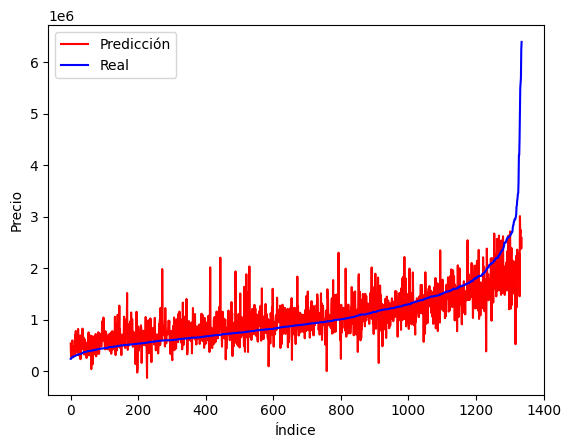

In [63]:
# Gráfica
plt.plot(df_sorted['index'], df_sorted['pred'], color='#FF0000', label='Predicción')
plt.plot(df_sorted['index'], df_sorted['test'], color='#0000FF', label='Real')

plt.xlabel('Índice')
plt.ylabel('Precio')

plt.legend()
plt.show()
